In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#extrapolate the approx epidentures for Medicare Part B in 2017
F5 = pd.read_csv("F5_NHPhys_util anonymous.csv")
F5.head()
#get total payment
total_payemnt = F5['line_srvc_cnt']*F5['average_Medicare_payment_amt']
#just for NH
NH_medicare = sum(total_payemnt)*3
print((NH_medicare / 280000)*57000000)
#adjust for total population
F5.head()





194451092955.3112


,npi,Random NPI,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_city,nppes_provider_zip,nppes_provider_state,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
0,1811152549,NaN,PA,M,I,NASHUA,30634068,NH,Physician Assistant,Y,O,82962,Blood glucose (sugar) test performed by hand-h...,N,444.0,351,444,3.21000,5.00,3.150000,3.150000
1,1811152549,NaN,PA,M,I,NASHUA,30634068,NH,Physician Assistant,Y,O,83036,Hemoglobin A1C level,N,407.0,330,407,13.32000,22.00,13.050000,13.050000
2,1811152549,NaN,PA,M,I,NASHUA,30634068,NH,Physician Assistant,Y,O,90662,Vaccine for influenza for injection into muscle,Y,24.0,24,24,48.24125,58.25,47.277500,47.277500
3,1811152549,NaN,PA,M,I,NASHUA,30634068,NH,Physician Assistant,Y,O,95251,Ambulatory continuous glucose (sugar) includin...,N,14.0,12,14,38.31000,85.00,30.040000,29.660000
4,1811152549,NaN,PA,M,I,NASHUA,30634068,NH,Physician Assistant,Y,O,99213,Established patient office or other outpatient...,N,62.0,59,62,64.38000,178.00,46.472258,45.368871


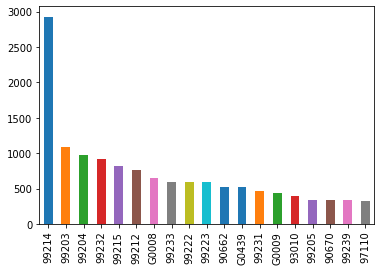

,npi,Random NPI,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_city,nppes_provider_zip,nppes_provider_state,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_amount
0,1811152549,NaN,PA,M,I,NASHUA,30634068,NH,Physician Assistant,Y,O,82962,Blood glucose (sugar) test performed by hand-h...,N,444.0,351,444,3.21000,5.00,3.150000,3.150000,1398.60
1,1811152549,NaN,PA,M,I,NASHUA,30634068,NH,Physician Assistant,Y,O,83036,Hemoglobin A1C level,N,407.0,330,407,13.32000,22.00,13.050000,13.050000,5311.35
2,1811152549,NaN,PA,M,I,NASHUA,30634068,NH,Physician Assistant,Y,O,90662,Vaccine for influenza for injection into muscle,Y,24.0,24,24,48.24125,58.25,47.277500,47.277500,1134.66
3,1811152549,NaN,PA,M,I,NASHUA,30634068,NH,Physician Assistant,Y,O,95251,Ambulatory continuous glucose (sugar) includin...,N,14.0,12,14,38.31000,85.00,30.040000,29.660000,420.56
4,1811152549,NaN,PA,M,I,NASHUA,30634068,NH,Physician Assistant,Y,O,99213,Established patient office or other outpatient...,N,62.0,59,62,64.38000,178.00,46.472258,45.368871,2881.28


In [3]:
#examin counts of codes
F5['hcpcs_code'].value_counts()[1:20].plot.bar()
plt.show()
#for all of NH ,give summary tables fo each kind of hcpcs code
#create new column to total amount
F5['total_amount'] = F5['line_srvc_cnt']*F5['average_Medicare_payment_amt']
F5.head()


In [4]:
print("total codes in NH are "+ str(len(F5['hcpcs_code'].value_counts())))
#get apporpropraite columns
cols_to_use = ["hcpcs_code","hcpcs_description","bene_day_srvc_cnt","average_Medicare_payment_amt",
              "total_amount"]
group_by_hcpcs = F5[cols_to_use].groupby(["hcpcs_code","hcpcs_description"]).describe()
group_by_hcpcs.head()



total codes in NH are 1611


average_Medicare_payment_amt  \
                                                                                     count   
hcpcs_code hcpcs_description                                                                 
0159T      Computer-aided detection and computer algorithm...                          1.0   
0191T      Internal insertion of eye fluid drainage device                             7.0   
0296T      External EKG recording for more than 48 hours u...                          4.0   
0298T      Review and interpretation of external EKG recor...                         30.0   
10022      Fine needle aspiration using imaging guidance                              25.0   

                                                                            \
                                                                      mean   
hcpcs_code hcpcs_description                                                 
0159T      Computer-aided detection and computer algorithm...     8.270000   
0191T      Internal insertion of eye fluid drainage device     1019.711898   
0296T      External EKG recording for more than 48 hours u...    21.613372   
0298T      Review and interpretation of external EKG recor...    20.880145   
10022      Fine needle aspiration using imaging guidance         76.553194   

                                                                           \
                                                                      std   
hcpcs_code hcpcs_description                                                
0159T      Computer-aided detection and computer algorithm...         NaN   
0191T      Internal insertion of eye fluid drainage device     833.075861   
0296T      External EKG recording for more than 48 hours u...    2.060138   
0298T      Review and interpretation of external EKG recor...    0.825788   
10022      Fine needle aspiration using imaging guidance        31.390417   

                                                                           \
                                                                      min   
hcpcs_code hcpcs_description                                                
0159T      Computer-aided detection and computer algorithm...    8.270000   
0191T      Internal insertion of eye fluid drainage device     338.340000   
0296T      External EKG recording for more than 48 hours u...   19.062157   
0298T      Review and interpretation of external EKG recor...   18.568182   
10022      Fine needle aspiration using imaging guidance        45.284762   

                                                                           \
                                                                      25%   
hcpcs_code hcpcs_description                                                
0159T      Computer-aided detection and computer algorithm...    8.270000   
0191T      Internal insertion of eye fluid drainage device     358.438421   
0296T      External EKG recording for more than 48 hours u...   20.506409   
0298T      Review and interpretation of external EKG recor...   20.648269   
10022      Fine needle aspiration using imaging guidance        49.107826   

                                                                           \
                                                                      50%   
hcpcs_code hcpcs_description                                                
0159T      Computer-aided detection and computer algorithm...    8.270000   
0191T      Internal insertion of eye fluid drainage device     359.620000   
0296T      External EKG recording for more than 48 hours u...   21.781221   
0298T      Review and interpretation of external EKG recor...   21.212429   
10022      Fine needle aspiration using imaging guidance        53.460313   

                                                                            \
                                                                       75%   
hcpcs_code hcpcs_description                                

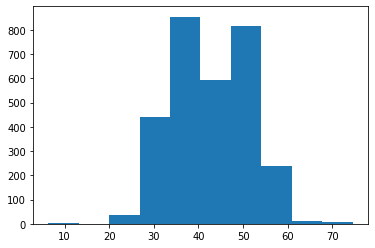

In [6]:
group_by_hcpcs['average_Medicare_payment_amt'].sort_values(by='count',ascending=False).head(15)
#lets get a distributions for the average medicare payments by codes
#just grad the frist 20 codes or so
group_by_hcpcs['average_Medicare_payment_amt'].sort_values(by='count',
                                                               ascending=False).index[0][1]
index = F5['hcpcs_description'] == group_by_hcpcs['average_Medicare_payment_amt'].sort_values(by='count',
                                                               ascending=False).index[0][1]
plt.hist(F5[index]['average_Medicare_payment_amt'])
plt.show()
    





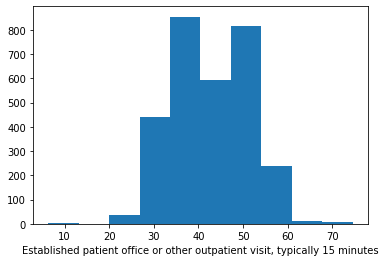

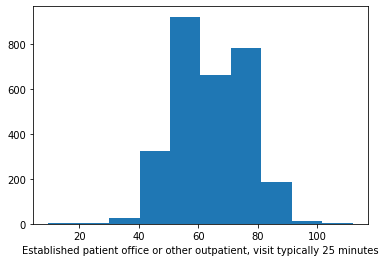

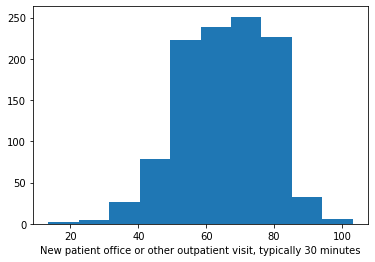

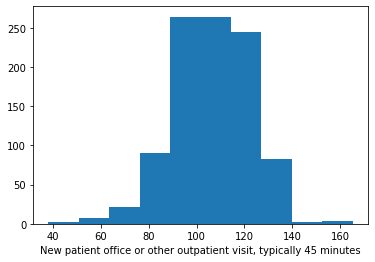

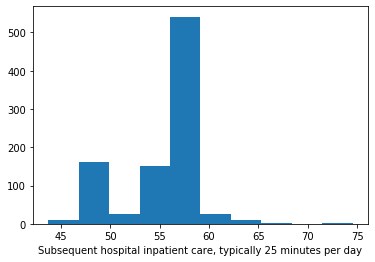

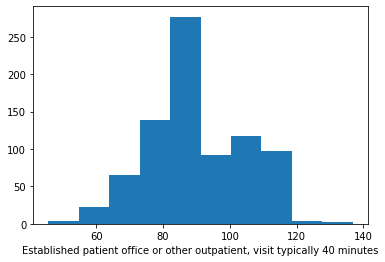

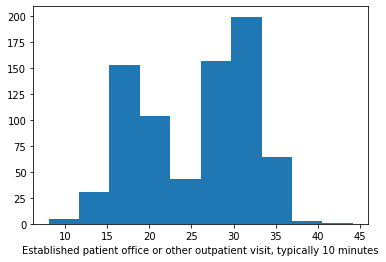

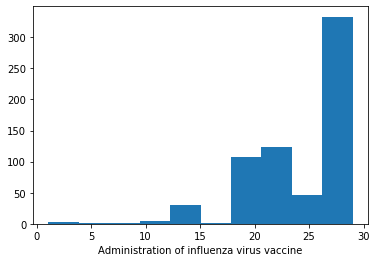

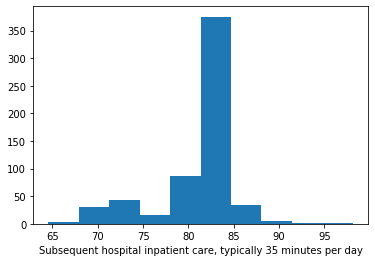

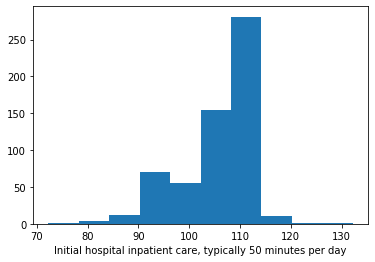

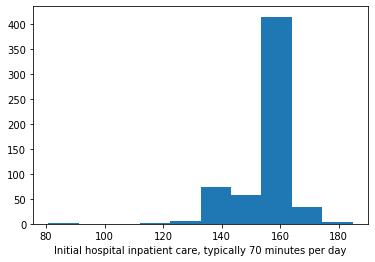

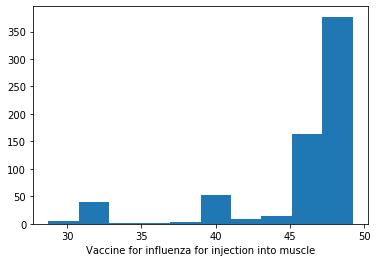

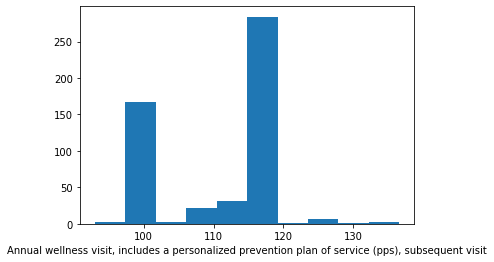

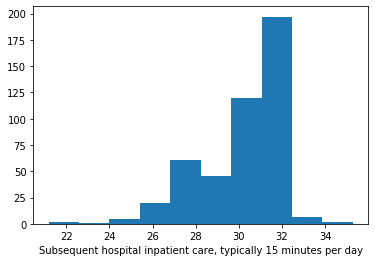

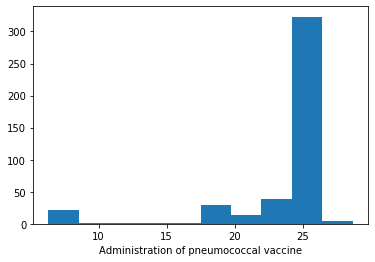

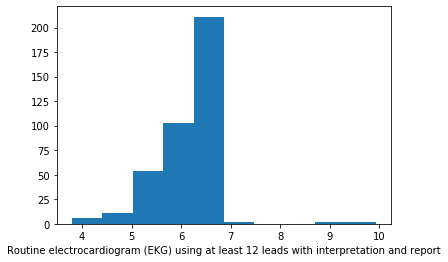

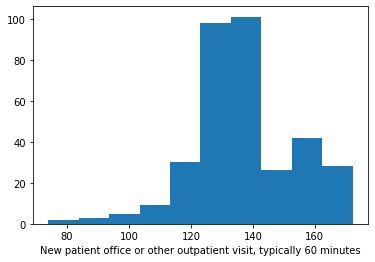

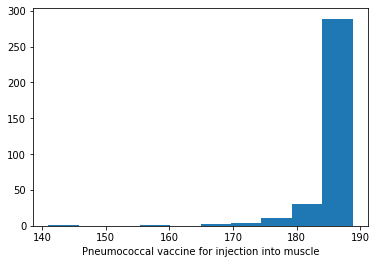

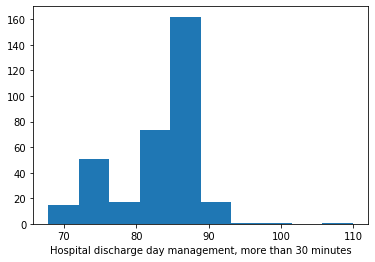

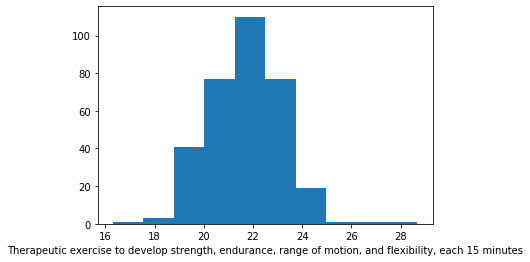

In [7]:
for index in group_by_hcpcs['average_Medicare_payment_amt'].sort_values(by='count',
                                                               ascending=False).index[0:20]:
    #get appropriate index
    index_1 = index[1]
    #search through f5
    index_to_search = F5['hcpcs_description'] == index_1
    #subset F5
    to_plot = F5[index_to_search]['average_Medicare_payment_amt']
    plt.hist(to_plot)
    plt.xlabel(index_1)
    plt.show()
    
    

In [24]:
group_by_hcpcs['bene_day_srvc_cnt'].sort_values(by='count',ascending=False).head(15)

,,count,mean,std,min,25%,50%,75%,max
hcpcs_code,hcpcs_description,,,,,,,,
99213,"Established patient office or other outpatient visit, typically 15 minutes",3003.0,168.249084,206.059961,11.0,40.0,97.0,217.00,2279.0
99214,"Established patient office or other outpatient, visit typically 25 minutes",2927.0,196.492655,241.549049,11.0,43.0,115.0,260.00,3357.0
99203,"New patient office or other outpatient visit, typically 30 minutes",1089.0,50.440771,51.725790,11.0,17.0,30.0,63.00,415.0
99204,"New patient office or other outpatient visit, typically 45 minutes",980.0,44.866327,39.648371,11.0,18.0,30.0,55.00,292.0
99232,"Subsequent hospital inpatient care, typically 25 minutes per day",924.0,189.081169,285.682792,11.0,33.0,81.0,225.25,2698.0
99215,"Established patient office or other outpatient, visit typically 40 minutes",822.0,56.302920,74.470110,11.0,18.0,28.0,67.50,765.0
99212,"Established patient office or other outpatient visit, typically 10 minutes",759.0,76.245059,128.323863,11.0,18.0,33.0,77.00,1754.0
G0008,Administration of influenza virus vaccine,655.0,115.351145,114.539867,11.0,33.0,86.0,155.50,1046.0
99233,"Subsequent hospital inpatient care, typically 35 minutes per day",598.0,120.876254,136.704359,11.0,31.0,72.0,155.75,995.0


In [25]:
group_by_hcpcs['total_amount'].sort_values(by='mean',ascending=False).head(20)

,,count,mean,std,min,25%,50%,75%,max
hcpcs_code,hcpcs_description,,,,,,,,
J2778,"Injection, ranibizumab, 0.1 mg",3.0,633133.266650,819302.659635,77164.880000,162693.129991,248221.379982,911117.459975,1.574014e+06
J0178,"Injection, aflibercept, 1 mg",10.0,564224.182000,412420.390114,30563.010000,245009.307502,578176.785006,878978.950042,1.255606e+06
G0480,"Drug test(s), definitive, utilizing drug identification methods able to identify individual drugs and distinguish between structural isomers (but not necessarily stereoisomers), including, but not limited to gc/ms (any type, single or tandem) and lc/ms (an",1.0,419466.089843,NaN,419466.089843,419466.089843,419466.089843,419466.089843,4.194661e+05
G6015,"Intensity modulated treatment delivery, single or multiple fields/arcs,via narrow spatially and temporally modulated beams, binary, dynamic mlc, per treatment session",2.0,409205.239983,453579.004656,88476.449987,248840.844985,409205.239983,569569.634981,7.299340e+05
J1745,"Injection, infliximab, excludes biosimilar, 10 mg",2.0,385756.809977,220300.362170,229980.929989,307868.869983,385756.809977,463644.749971,5.415327e+05
36478,"Laser destruction of incompetent vein of arm or leg using imaging guidance, accessed through the skin",1.0,380404.909991,NaN,380404.909991,380404.909991,380404.909991,380404.909991,3.804049e+05
J2505,"Injection, pegfilgrastim, 6 mg",2.0,213310.949988,39814.962505,185157.520008,199234.234998,213310.949988,227387.664978,2.414644e+05
J0129,"Injection, abatacept, 10 mg (code may be used for medicare when drug administered under the direct supervision of a physician, not for use when drug is self administered)",1.0,210327.949996,NaN,210327.949996,210327.949996,210327.949996,210327.949996,2.103279e+05
17311,"Removal and microscopic examination of growth of the head, neck, hands, feet, or genitals (first stage, up to 5 tissue blocks)",8.0,152989.987502,120549.690370,15265.769998,86240.980015,142492.339993,177538.974996,4.127292e+05


In [27]:
#now lets examine for each city
F5.head()
cols_to_use2 = ['hcpcs_code','hcpcs_description','nppes_provider_city',"bene_day_srvc_cnt","average_Medicare_payment_amt",
              "total_amount"]
group_by_city = F5[cols_to_use2].groupby(['hcpcs_code','hcpcs_description',"nppes_provider_city"]).describe()
group_by_city.head()
#i could pull it apart the same i did with hcpcs codes, but i think i get the point

average_Medicare_payment_amt  \
                                                                                                         count   
hcpcs_code hcpcs_description                                  nppes_provider_city                                
0159T      Computer-aided detection and computer algorithm... ROCHESTER                                    1.0   
0191T      Internal insertion of eye fluid drainage device    LONDONDERRY                                  1.0   
                                                              MANCHESTER                                   2.0   
                                                              NASHUA                                       2.0   
                                                              PORTSMOUTH                                   1.0   

                                                                                                \
                                                                                          mean   
hcpcs_code hcpcs_description                                  nppes_provider_city                
0159T      Computer-aided detection and computer algorithm... ROCHESTER               8.270000   
0191T      Internal insertion of eye fluid drainage device    LONDONDERRY           357.256842   
                                                              MANCHESTER           1077.276857   
                                                              NASHUA               1186.370000   
                                                              PORTSMOUTH            338.340000   

                                                                                                \
                                                                                           std   
hcpcs_code hcpcs_description                                  nppes_provider_city                
0159T      Computer-aided detection and computer algorithm... ROCHESTER                    NaN   
0191T      Internal insertion of eye fluid drainage device    LONDONDERRY                  NaN   
                                                              MANCHESTER           1014.920060   
                                                              NASHUA               1169.201063   
                                                              PORTSMOUTH                   NaN   

                                                                                               \
                                                                                          min   
hcpcs_code hcpcs_description                                  nppes_provider_city               
0159T      Computer-aided detection and computer algorithm... ROCHESTER              8.270000   
0191T      Internal insertion of eye fluid drainage device    LONDONDERRY          357.256842   
                                                              MANCHESTER           359.620000   
                                                              NASHUA               359.620000   
                                                              PORTSMOUTH           338.340000   

                                                                                               \
                                                                                          25%   
hcpcs_code hcpcs_description                                  nppes_provider_city               
0159T      Computer-aided detection and computer algorithm... ROCHESTER              8.270000   
0191T      Internal insertion of eye fluid drainage device    LONDONDERRY          357.256842   
                                                              MANCHESTER           718.448429   
                                                              NASHUA               772.995000   
                                                              PORTSMOUTH           338.340000   

                                             

In [45]:
code_city = group_by_city['average_Medicare_payment_amt'][['count','mean']].sort_values(by="mean",ascending=False).reset_index()
code_city[code_city['hcpcs_code'] == '99213']



,hcpcs_code,hcpcs_description,nppes_provider_city,count,mean
4839,99213,Established patient office or other outpatient...,TAMWORTH,1.0,56.032000
5024,99213,Established patient office or other outpatient...,LONDONBERRY,1.0,53.443690
5054,99213,Established patient office or other outpatient...,JEFFERSON,1.0,52.985161
5249,99213,Established patient office or other outpatient...,NORTH HAMPTON,3.0,50.032801
5258,99213,Established patient office or other outpatient...,TWIN MOUNTAIN,1.0,49.923459
5298,99213,Established patient office or other outpatient...,PORTMOUTH,1.0,49.438571
5340,99213,Established patient office or other outpatient...,WOLFEBORO,3.0,49.008390
5346,99213,Established patient office or other outpatient...,LINCOLN,1.0,48.917402
5351,99213,Established patient office or other outpatient...,SOMERSWORTH,54.0,48.839179
5443,99213,Established patient office or other outpatient...,CHESTERFIELD,1.0,47.881629


In [47]:
code_city = group_by_city['bene_day_srvc_cnt'][['count','mean']].sort_values(by="mean",ascending=False).reset_index()
code_city[code_city['hcpcs_code'] == '99213']

,hcpcs_code,hcpcs_description,nppes_provider_city,count,mean
32,99213,Established patient office or other outpatient...,CHESTERFIELD,1.0,1314.000000
57,99213,Established patient office or other outpatient...,LINCOLN,1.0,1097.000000
220,99213,Established patient office or other outpatient...,NEW HAMPTON,1.0,587.000000
269,99213,Established patient office or other outpatient...,HINSDALE,1.0,531.000000
417,99213,Established patient office or other outpatient...,HOOKSETT,22.0,420.500000
568,99213,Established patient office or other outpatient...,JEFFERSON,1.0,341.000000
739,99213,Established patient office or other outpatient...,BARRINGTON,23.0,284.086957
741,99213,Established patient office or other outpatient...,LITTLETON,23.0,283.521739
772,99213,Established patient office or other outpatient...,CLAREMONT,16.0,276.937500
803,99213,Established patient office or other outpatient...,TILTON,2.0,270.500000


In [46]:
code_city = group_by_city['total_amount'][['count','mean']].sort_values(by="mean",ascending=False).reset_index()
code_city.head()


,hcpcs_code,hcpcs_description,nppes_provider_city,count,mean
0,J2778,"Injection, ranibizumab, 0.1 mg",CONCORD,1.0,1.574014e+06
1,J0178,"Injection, aflibercept, 1 mg",PORTSMOUTH,1.0,1.255606e+06
2,J0178,"Injection, aflibercept, 1 mg",LEBANON,1.0,9.657193e+05
3,J0178,"Injection, aflibercept, 1 mg",CONCORD,2.0,7.893398e+05
4,G6015,"Intensity modulated treatment delivery, single...",NASHUA,1.0,7.299340e+05


<h1> Hospital Discharge Data </h1>

In [53]:
#this is gonna kill my ram and is a sin, but im just gonna load in both IP OP files
in_patient = pd.read_csv("F3_IP_Sample.csv")
out_patient = pd.read_csv("F4_OP_Sample.csv")
cols_to_keep = pd.read_csv("F1_colstokeep.csv")

In [54]:
print(in_patient.shape)
print(out_patient.shape)

(37959, 266)
(284894, 266)


In [55]:
cols_to_keep = pd.read_csv("F1_colstokeep.csv")
cols_to_keep = [col[0] for col in list(cols_to_keep.values)]
cols_to_keep

['DISCHARGE_KEY',
 'HOSPITAL_NME',
 'PT_AGE',
 'PT_GENDER_CDE',
 'PT_RACE_1_CDE',
 'PT_ETHNICITY_CDE',
 'PT_LANGUAGE_GROUP',
 'PT_RESIDENCE_CDE',
 'DISCHARGE_TYPE',
 'ED_FLAG',
 'OBS_FLAG',
 'LENGTH_OF_STAY',
 'ADMISSION_HOUR_NBR',
 'ADMISSION_SOURCE_CDE',
 'PT_RELATIONSHIP_CDE',
 'PRIMARY_PAY_GROUP_TXT',
 'TTL_DISCHARGE_CHG_AMT',
 'ADMITTING_DX_CDE',
 'ICD_VERSION',
 'PRINCIPAL_DX_CDE',
 'HDD_HOSPITAL_CDE',
 'FACILITY_TYPE_CDE',
 'CLAIM_FREQ',
 'DISCHARGE_HOUR_NBR',
 'PT_DISCHARGE_STATUS_CDE',
 'OTHER_DX_1_CDE',
 'OTHER_DX_2_CDE',
 'OTHER_DX_3_CDE',
 'OTHER_DX_4_CDE',
 'OTHER_DX_5_CDE',
 'OTHER_DX_6_CDE',
 'OTHER_DX_7_CDE',
 'OTHER_DX_8_CDE',
 'OTHER_DX_9_CDE',
 'OTHER_DX_10_CDE',
 'AGENCY_DRG_CDE',
 'AGENCY_MDC_CDE',
 'PRINCIPAL_PROCEDURE_CDE',
 'PRINCIPAL_DX_POA_CDE']

In [56]:
#rewrite frames
in_patient = in_patient[cols_to_keep]
out_patient = out_patient[cols_to_keep]

In [52]:
#columns are the same
#in_patient['Type'] = ["In Patient" for i in range(in_patient.shape[0])]
#out_patient['Type'] = ["Out Patient" for i in range(out_patient.shape[0])]

In [57]:
print(in_patient.columns == out_patient.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [58]:
discharge = pd.concat([in_patient,out_patient],axis=0)

In [59]:
print(discharge.shape)
discharge.head()

(322853, 39)


,DISCHARGE_KEY,HOSPITAL_NME,PT_AGE,PT_GENDER_CDE,PT_RACE_1_CDE,PT_ETHNICITY_CDE,PT_LANGUAGE_GROUP,PT_RESIDENCE_CDE,DISCHARGE_TYPE,ED_FLAG,OBS_FLAG,LENGTH_OF_STAY,ADMISSION_HOUR_NBR,ADMISSION_SOURCE_CDE,PT_RELATIONSHIP_CDE,PRIMARY_PAY_GROUP_TXT,TTL_DISCHARGE_CHG_AMT,ADMITTING_DX_CDE,ICD_VERSION,PRINCIPAL_DX_CDE,HDD_HOSPITAL_CDE,FACILITY_TYPE_CDE,CLAIM_FREQ,DISCHARGE_HOUR_NBR,PT_DISCHARGE_STATUS_CDE,OTHER_DX_1_CDE,OTHER_DX_2_CDE,OTHER_DX_3_CDE,OTHER_DX_4_CDE,OTHER_DX_5_CDE,OTHER_DX_6_CDE,OTHER_DX_7_CDE,OTHER_DX_8_CDE,OTHER_DX_9_CDE,OTHER_DX_10_CDE,AGENCY_DRG_CDE,AGENCY_MDC_CDE,PRINCIPAL_PROCEDURE_CDE,PRINCIPAL_DX_POA_CDE
0,100,Androscoggin Valley Hospital,68,F,R5,E2,English,33007,IP,0,0,3,13.0,1,18,Medicare,8488.68,486,ICD9,7907,AVH,11,1,15.0,61,0039,486,496,32723,51889,27801,73710,V8542,25000,5853,871.0,18.0,9390,Y
1,1000073,Southern New Hampshire Medical Center,88,F,R5,E2,English,33011,IP,0,0,3,9.0,6,18,Medicare,29690.83,82021,ICD9,82021,SNH,11,1,13.0,3,2851,2761,42832,5854,51883,2767,30000,42731,4280,40390,481.0,8.0,7935,Y
2,1000139,Southern New Hampshire Medical Center,80,F,R5,E2,English,33011,IP,0,0,6,12.0,5,18,Medicare,22939.94,78097,ICD9,28860,SNH,11,1,15.0,3,5849,40390,5853,27651,7802,79902,4378,79431,78079,78720,815.0,16.0,NaN,Y
3,1000181,Southern New Hampshire Medical Center,65,F,R5,E7,English,33011,IP,1,0,1,19.0,1,18,Medicare,6991.83,82009,ICD9,82009,SNH,11,1,13.0,99,4240,3051,V140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,536.0,8.0,NaN,Y
4,1000319,Southern New Hampshire Medical Center,86,F,R5,E2,English,33011,IP,0,0,20,18.0,1,18,Medicare,89642.76,7802,ICD9,4822,SNH,11,1,14.0,20,51884,42831,5849,23874,7455,2536,27803,4280,78702,27651,193.0,4.0,3893,Y


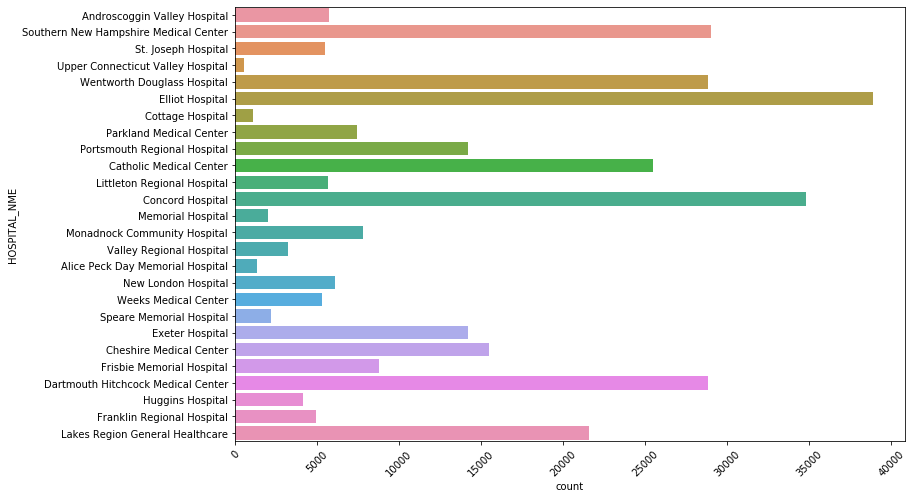

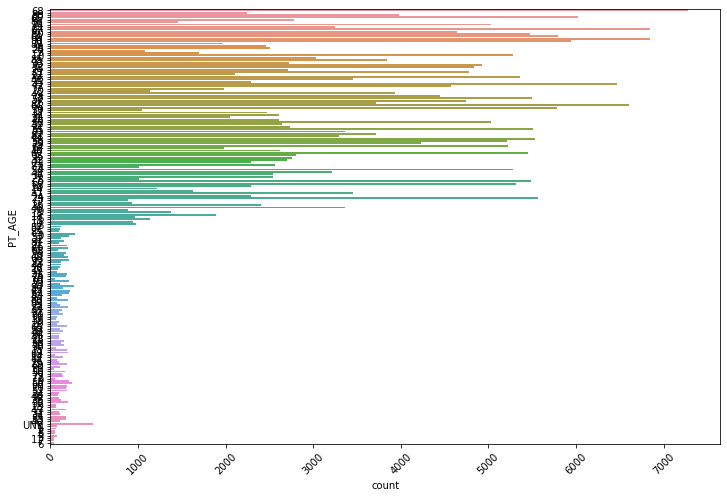

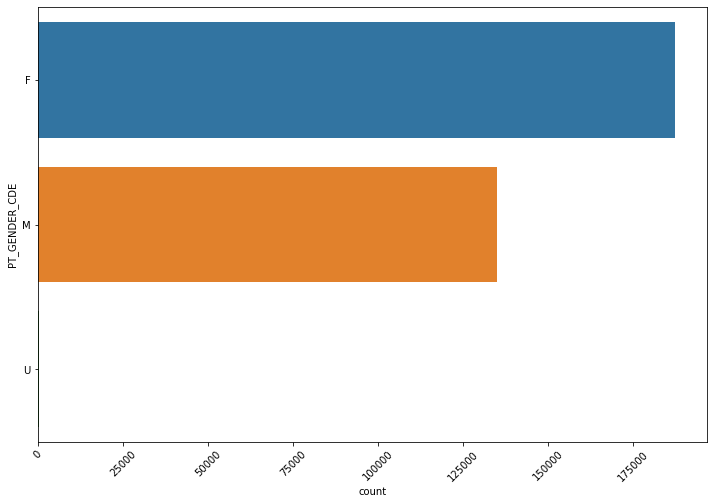

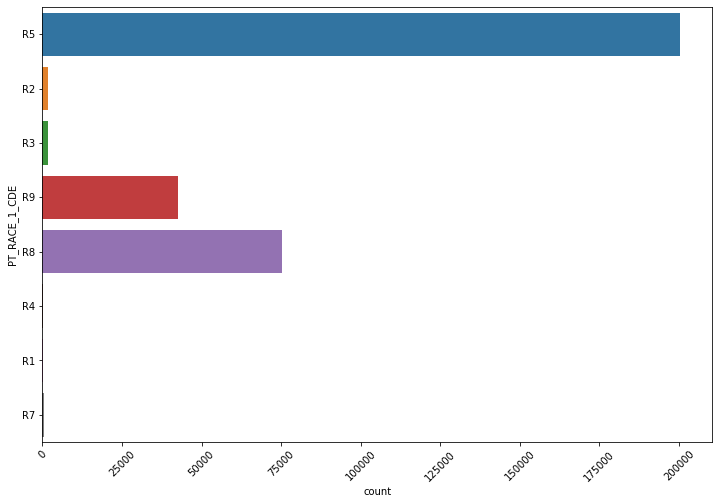

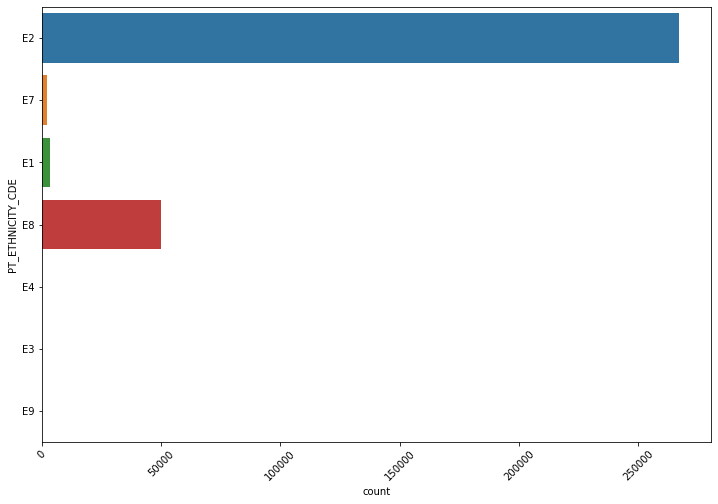

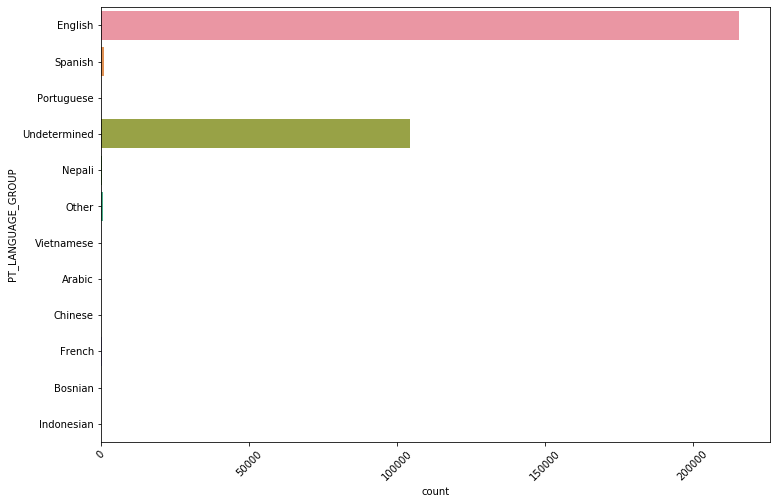

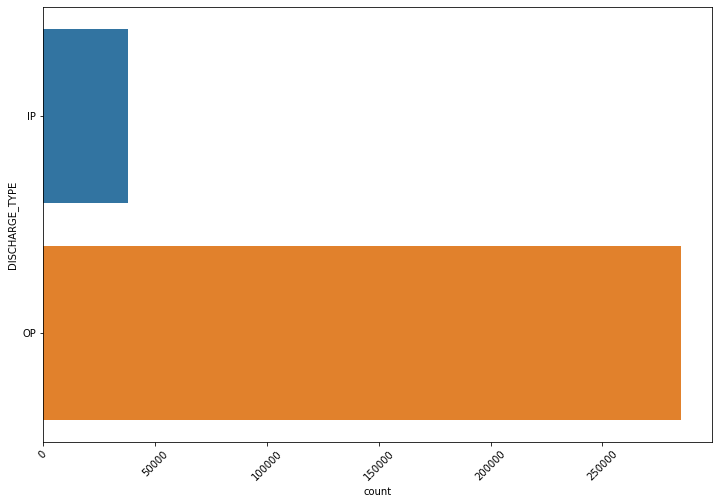

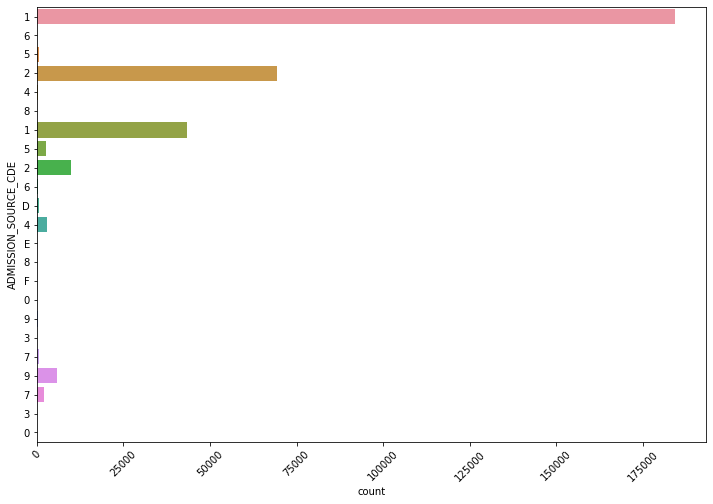

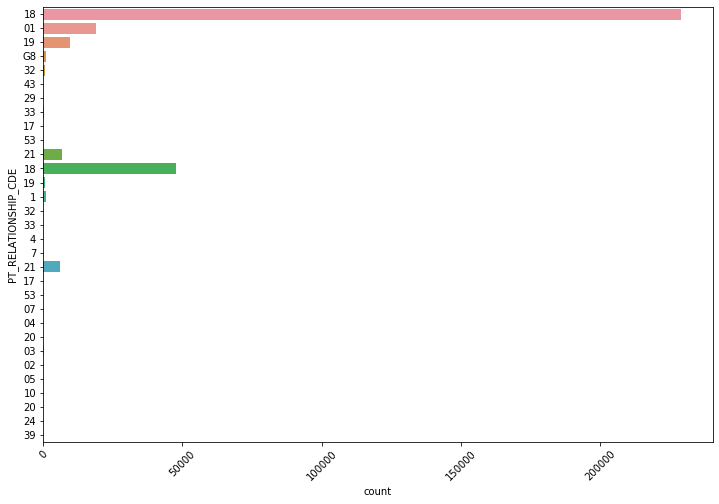

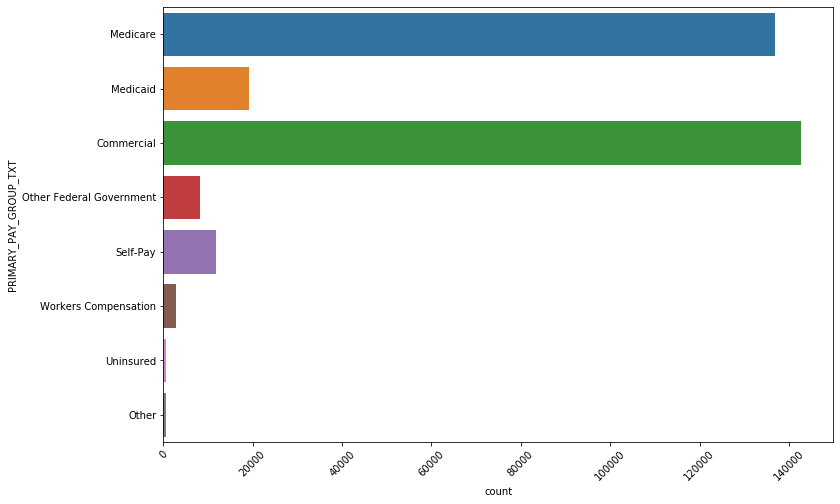

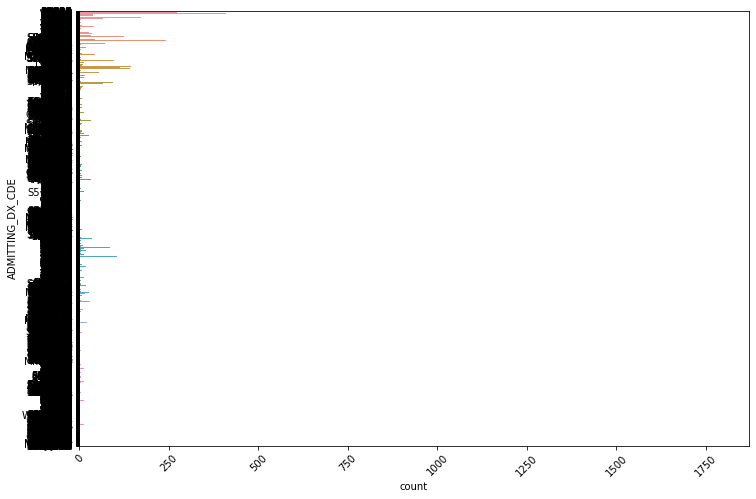

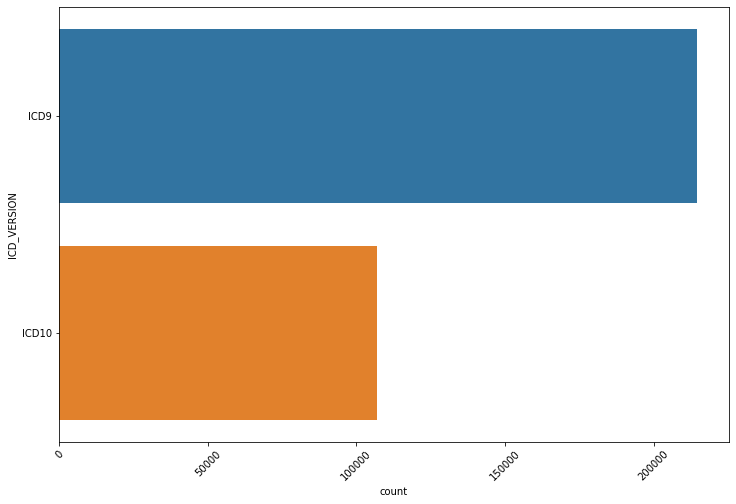

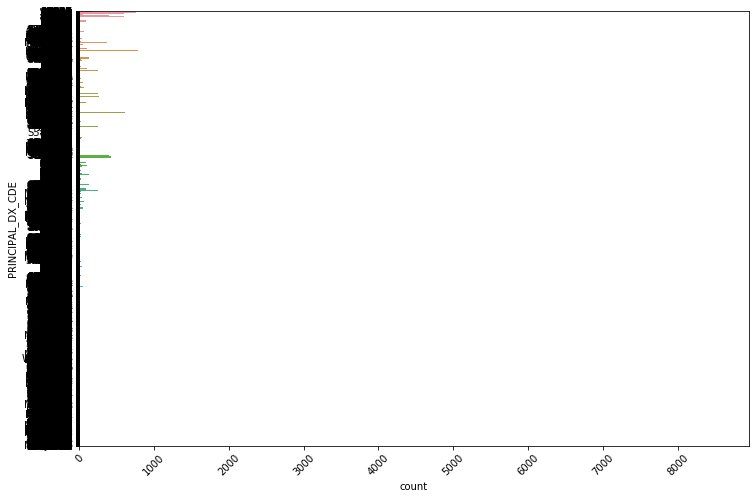

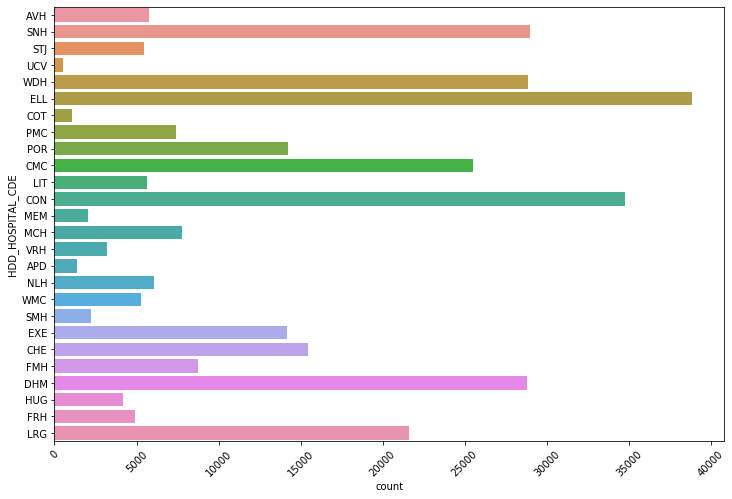

In [19]:
#grab only certain cats to examine not all of them, some vars have too many uniques one
first1 = list(discharge.columns[discharge.dtypes.values == 'O'])[0:14]
for a in first1:
    plt.figure(figsize=(12,8))
    sns.countplot(y=a, data=discharge)
    plt.xticks(rotation = 45)
    plt.show()

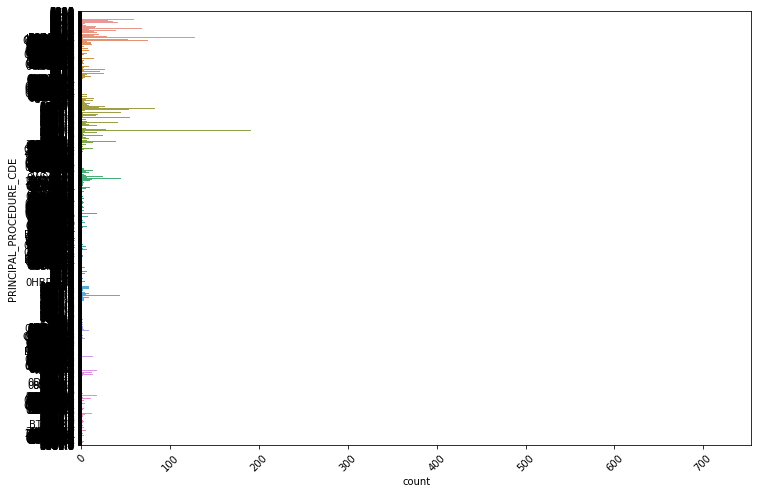

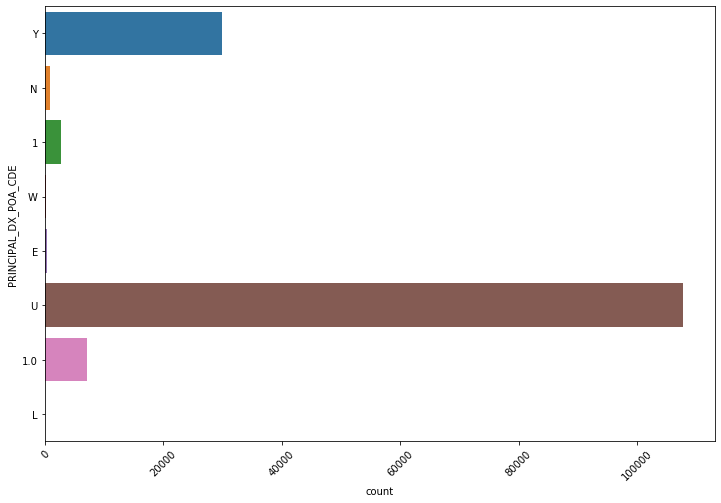

In [34]:
#now for the unique ones, there are two many unique ones
list2 = list(discharge.columns[discharge.dtypes.values == 'O'])[-2:]
for a in list2:
    plt.figure(figsize=(12,8))
    sns.countplot(y=a, data=discharge)
    plt.xticks(rotation = 45)
    plt.show()


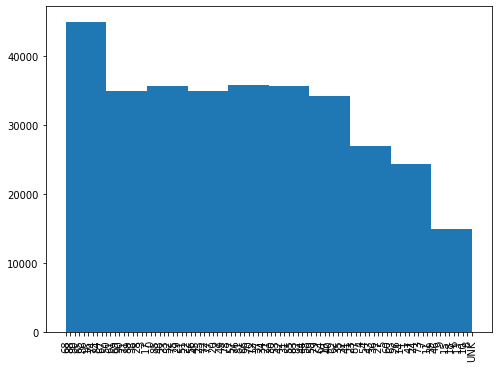

In [46]:
plt.figure(figsize=(8,6))
plt.hist(np.array(list(discharge["PT_AGE"].values)))
plt.xticks(rotation=90)
plt.show()

<h1> Ranking by TTL_DISCHARGE_CHG_AMT </h1>

In [60]:
#first order hospitals alphabetically
hospitals_alpha = sorted(list(discharge['HOSPITAL_NME'].unique()))

In [61]:
#most expensive first
hospitals_ranked_TTL_DISCHARGE = list(discharge.groupby("HOSPITAL_NME").describe()['TTL_DISCHARGE_CHG_AMT'].sort_values(by='mean',
                                                                                  ascending=False).index)

#define functino to get list of hospitals sorted avgmount ascending
def order_hospitals(df=discharge,col = "HOSPITAL_NME",var = "TTL_DISCHARGE_CHG_AMT"):
    return(list(df.groupby(col).describe()[var].sort_values(by='mean',ascending=False).index))




In [63]:
hospitals_ranked_TTL_DISCHARGE

['Dartmouth Hitchcock Medical Center',
 'Portsmouth Regional Hospital',
 'St. Joseph Hospital',
 'Parkland Medical Center',
 'Alice Peck Day Memorial Hospital',
 'Catholic Medical Center',
 'Concord Hospital',
 'Exeter Hospital',
 'Memorial Hospital',
 'Cottage Hospital',
 'Speare Memorial Hospital',
 'Frisbie Memorial Hospital',
 'Wentworth Douglass Hospital',
 'Upper Connecticut Valley Hospital',
 'Lakes Region General Healthcare',
 'Elliot Hospital',
 'Cheshire Medical Center',
 'Southern New Hampshire Medical Center',
 'Littleton Regional Hospital',
 'Huggins Hospital',
 'New London Hospital',
 'Valley Regional Hospital',
 'Franklin Regional Hospital',
 'Monadnock Community Hospital',
 'Androscoggin Valley Hospital',
 'Weeks Medical Center']

<h1> Ranking ED cases </h1>

In [68]:
#subset ED_flag ==1
hospitals_ranked_ED_cases = order_hospitals(discharge[discharge['ED_FLAG'] == 1])

<h1> Ranking Most Expensive DRG </h1>
    <h1> Ranking Second Most Expnesive DRG </h1>

In [78]:
#drgs only on IP
discharge[discharge["DISCHARGE_TYPE"] == 
          "IP"].groupby("AGENCY_DRG_CDE").describe()["TTL_DISCHARGE_CHG_AMT"].sort_values(by='mean',ascending=False).head()





,count,mean,std,min,25%,50%,75%,max
AGENCY_DRG_CDE,,,,,,,,
461.0,1.0,712757.540000,NaN,712757.54,712757.540,712757.54,712757.54,712757.54
453.0,1.0,569269.490000,NaN,569269.49,569269.490,569269.49,569269.49,569269.49
969.0,1.0,565949.130000,NaN,565949.13,565949.130,565949.13,565949.13,565949.13
3.0,41.0,479643.442683,292210.74514,2000.00,249588.960,444165.19,638705.52,1181797.00
4.0,23.0,337187.918261,339892.32716,30656.92,168660.385,266472.91,370538.00,1664188.12


In [84]:
#most epensive drg code is 461
#second most expensive drg code is 453
hospitals_ranked_most_expensive_DRG = order_hospitals(discharge[discharge['AGENCY_DRG_CDE'] == 461.0])
hospitals_ranked_second_most_expensive_DRG=order_hospitals(discharge[discharge['AGENCY_DRG_CDE'] == 453.0])



<h1> Ranking by Discharge to Medicare </h1>

In [90]:
hospitals_ranked_Discharge_Medicare = order_hospitals(discharge[discharge['PRIMARY_PAY_GROUP_TXT'] == "Medicare"])
hospitals_ranked_Discharge_Medicare

['Dartmouth Hitchcock Medical Center',
 'St. Joseph Hospital',
 'Portsmouth Regional Hospital',
 'Alice Peck Day Memorial Hospital',
 'Parkland Medical Center',
 'Cottage Hospital',
 'Catholic Medical Center',
 'Memorial Hospital',
 'Exeter Hospital',
 'Speare Memorial Hospital',
 'Frisbie Memorial Hospital',
 'Wentworth Douglass Hospital',
 'Upper Connecticut Valley Hospital',
 'Concord Hospital',
 'Southern New Hampshire Medical Center',
 'Lakes Region General Healthcare',
 'Littleton Regional Hospital',
 'Elliot Hospital',
 'Cheshire Medical Center',
 'Valley Regional Hospital',
 'Huggins Hospital',
 'New London Hospital',
 'Monadnock Community Hospital',
 'Franklin Regional Hospital',
 'Androscoggin Valley Hospital',
 'Weeks Medical Center']

<h1> Ranking by Discharge to Medicaid </h1>

In [91]:
hospitals_ranked_Discharge_Medicaid = order_hospitals(discharge[discharge['PRIMARY_PAY_GROUP_TXT'] == "Medicaid"])
hospitals_ranked_Discharge_Medicaid


['Portsmouth Regional Hospital',
 'Dartmouth Hitchcock Medical Center',
 'Parkland Medical Center',
 'Concord Hospital',
 'Lakes Region General Healthcare',
 'Cheshire Medical Center',
 'Catholic Medical Center',
 'St. Joseph Hospital',
 'Wentworth Douglass Hospital',
 'Exeter Hospital',
 'Elliot Hospital',
 'Franklin Regional Hospital',
 'Valley Regional Hospital',
 'Androscoggin Valley Hospital',
 'Southern New Hampshire Medical Center',
 'Cottage Hospital',
 'Frisbie Memorial Hospital',
 'Speare Memorial Hospital',
 'Alice Peck Day Memorial Hospital',
 'Memorial Hospital',
 'Upper Connecticut Valley Hospital',
 'Littleton Regional Hospital',
 'Monadnock Community Hospital',
 'Huggins Hospital',
 'Weeks Medical Center',
 'New London Hospital']

<h1> Ranking by Discharge to Commercial Insurance </h1>

In [92]:
hospitals_ranked_Discharge_Commercial = order_hospitals(discharge[discharge['PRIMARY_PAY_GROUP_TXT'] == "Commercial"])
hospitals_ranked_Discharge_Commercial

['Dartmouth Hitchcock Medical Center',
 'Portsmouth Regional Hospital',
 'Alice Peck Day Memorial Hospital',
 'St. Joseph Hospital',
 'Catholic Medical Center',
 'Parkland Medical Center',
 'Concord Hospital',
 'Memorial Hospital',
 'Exeter Hospital',
 'Speare Memorial Hospital',
 'Cheshire Medical Center',
 'Frisbie Memorial Hospital',
 'Cottage Hospital',
 'Wentworth Douglass Hospital',
 'Upper Connecticut Valley Hospital',
 'Lakes Region General Healthcare',
 'Elliot Hospital',
 'Littleton Regional Hospital',
 'Southern New Hampshire Medical Center',
 'Huggins Hospital',
 'Monadnock Community Hospital',
 'New London Hospital',
 'Franklin Regional Hospital',
 'Androscoggin Valley Hospital',
 'Valley Regional Hospital',
 'Weeks Medical Center']

<h1> Ranking by Average billed ICD10 </h1>

In [94]:
hospitals_ranked_billed_ICD10 = order_hospitals(discharge[discharge['ICD_VERSION'] == "ICD10"])
hospitals_ranked_billed_ICD10

['Portsmouth Regional Hospital',
 'St. Joseph Hospital',
 'Dartmouth Hitchcock Medical Center',
 'Parkland Medical Center',
 'Catholic Medical Center',
 'Alice Peck Day Memorial Hospital',
 'Concord Hospital',
 'Memorial Hospital',
 'Cottage Hospital',
 'Exeter Hospital',
 'Speare Memorial Hospital',
 'Frisbie Memorial Hospital',
 'Wentworth Douglass Hospital',
 'Upper Connecticut Valley Hospital',
 'Cheshire Medical Center',
 'Lakes Region General Healthcare',
 'Elliot Hospital',
 'Littleton Regional Hospital',
 'Southern New Hampshire Medical Center',
 'New London Hospital',
 'Valley Regional Hospital',
 'Monadnock Community Hospital',
 'Franklin Regional Hospital',
 'Huggins Hospital',
 'Androscoggin Valley Hospital',
 'Weeks Medical Center']

<h1> Hospital Rankings by aforementioned ranking schemes </h1>

In [261]:
hospitals_ranked = pd.DataFrame()
hospitals_ranked['Hospitals Alpha'] = hospitals_alpha
hospitals_ranked['Avg Total Discharge'] = hospitals_ranked_TTL_DISCHARGE
hospitals_ranked['Avg Discharge ED Cases'] = hospitals_ranked_ED_cases
hospitals_ranked['Avg Discharge Most Epxpensive DRG'] = pd.Series(hospitals_ranked_most_expensive_DRG,index=None)
hospitals_ranked['Avg Discharge Second Most Expensive DRG'] = pd.Series(hospitals_ranked_second_most_expensive_DRG,index=None)
hospitals_ranked['Avg Discharge to Medicare'] = hospitals_ranked_Discharge_Medicare
hospitals_ranked['Avg Discharge to Medicaid'] = hospitals_ranked_Discharge_Medicaid
hospitals_ranked['Avg Discharge to Commercial Insurace'] = hospitals_ranked_Discharge_Commercial
hospitals_ranked['Avg Billed ICD10'] = hospitals_ranked_billed_ICD10



In [262]:
hospitals_ranked.head()

,Hospitals Alpha,Avg Total Discharge,Avg Discharge ED Cases,Avg Discharge Most Epxpensive DRG,Avg Discharge Second Most Expensive DRG,Avg Discharge to Medicare,Avg Discharge to Medicaid,Avg Discharge to Commercial Insurace,Avg Billed ICD10
0,Alice Peck Day Memorial Hospital,Dartmouth Hitchcock Medical Center,Dartmouth Hitchcock Medical Center,Southern New Hampshire Medical Center,Dartmouth Hitchcock Medical Center,Dartmouth Hitchcock Medical Center,Portsmouth Regional Hospital,Dartmouth Hitchcock Medical Center,Portsmouth Regional Hospital
1,Androscoggin Valley Hospital,Portsmouth Regional Hospital,Portsmouth Regional Hospital,NaN,NaN,St. Joseph Hospital,Dartmouth Hitchcock Medical Center,Portsmouth Regional Hospital,St. Joseph Hospital
2,Catholic Medical Center,St. Joseph Hospital,Catholic Medical Center,NaN,NaN,Portsmouth Regional Hospital,Parkland Medical Center,Alice Peck Day Memorial Hospital,Dartmouth Hitchcock Medical Center
3,Cheshire Medical Center,Parkland Medical Center,Lakes Region General Healthcare,NaN,NaN,Alice Peck Day Memorial Hospital,Concord Hospital,St. Joseph Hospital,Parkland Medical Center
4,Concord Hospital,Alice Peck Day Memorial Hospital,Parkland Medical Center,NaN,NaN,Parkland Medical Center,Lakes Region General Healthcare,Catholic Medical Center,Catholic Medical Center


In [263]:
#define function that returns ranked order on the condition that ranking is for hospitals alpha
def order_hospitals_ranked(df,hospitals,col):
    ranking = []
    for hospital in df[hospitals]:
        #get index equal to hospital
        index = df[col] == hospital
        #in case there are none
        if sum(index) == 0:
            ranking.append(np.nan)
        #get length of index
        len_index = len(index)
        #traverse index
        for i in range(0,len_index):
            if index[i] == True:
                ranking.append(i)
            else:
                continue
        #adjust ranking, because of edge cases
        #if np.nansum(ranking) == 0:
            #find zero
         #   len_ranking = len(ranking)
            #traverse new ranking
          #  for j in range(0,len_ranking):
           #     if ranking[j] == 0:
                    #put index as value
            #        ranking[j] = j
    return(ranking)
order_hospitals_ranked(df = hospitals_ranked,hospitals = 'Hospitals Alpha',col = 'Avg Discharge Second Most Expensive DRG')
#FINALLY!
#use new function to overwrite columns

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [264]:
for column in list(hospitals_ranked.columns)[1:]:
    #use abover function
    hospitals_ranked[column] = order_hospitals_ranked(df = hospitals_ranked,hospitals = 'Hospitals Alpha',
                                                      col = column)

In [265]:
hospitals_ranked.head()

,Hospitals Alpha,Avg Total Discharge,Avg Discharge ED Cases,Avg Discharge Most Epxpensive DRG,Avg Discharge Second Most Expensive DRG,Avg Discharge to Medicare,Avg Discharge to Medicaid,Avg Discharge to Commercial Insurace,Avg Billed ICD10
0,Alice Peck Day Memorial Hospital,4,24,NaN,NaN,3,18,2,5
1,Androscoggin Valley Hospital,24,16,NaN,NaN,24,13,23,24
2,Catholic Medical Center,5,2,NaN,NaN,6,6,4,4
3,Cheshire Medical Center,16,10,NaN,NaN,18,5,10,14
4,Concord Hospital,6,5,NaN,NaN,13,3,6,6


<h1> New Ranking, sum acoss, average, if give NA zero for missing </h1>

In [266]:
np.nansum(hospitals_ranked.iloc[3,1:].values)
weight_sum_avg_ranking = []
for i in range(0, hospitals_ranked.shape[0]):
    #compute ranke
    new_rank = np.nansum(hospitals_ranked.iloc[i][1:].values) / 8
    #append rank
    weight_sum_avg_ranking.append(new_rank)
weight_sum_avg_ranking
    

[7.0,
 15.5,
 3.375,
 9.125,
 4.875,
 8.625,
 0.375,
 10.0,
 6.75,
 13.875,
 8.25,
 15.875,
 8.25,
 13.875,
 9.125,
 15.25,
 15.125,
 2.625,
 0.625,
 11.625,
 9.0,
 2.75,
 11.375,
 14.625,
 17.75,
 8.125]

<h1> New Ranking, TTL_DISCHARGE_CHG_AMT and ED cases weighted by 2 </h1>
<h1> New Ranking, Medicare, Medicaid, Commercial Insurance, weighted by 1.5 </h1>
<h1> New Ranking, Most Expensive Drg, Second Most Expensive DRG, Avg Billed ICD10, weighted by 1 </h1>

In [267]:
new_weighting_scheme = []
for i in range(0, hospitals_ranked.shape[0]):
    #store values
    values = list(hospitals_ranked.iloc[i][1:9].values)
    #adjust values
    values[0] = values[0]*2
    values[1] = values[1]*2
    values[4] = values[4]*1.5
    values[5] = values[5]*1.5
    values[6] = values[6]*1.5
    #get rank of new values
    new_rank = np.nansum(values) / 8
    #append rank
    new_weighting_scheme.append(new_rank)

In [268]:
#addd the new ranking scores
hospitals_ranked["Equal_weight_Score"] = weight_sum_avg_ranking
hospitals_ranked['Adjusted_weight_score'] = new_weighting_scheme

<h1> Final Rankings, note it starts at zero, if want to start at 1, and 1 to all rankings </h1>

In [269]:
hospitals_ranked

,Hospitals Alpha,Avg Total Discharge,Avg Discharge ED Cases,Avg Discharge Most Epxpensive DRG,Avg Discharge Second Most Expensive DRG,Avg Discharge to Medicare,Avg Discharge to Medicaid,Avg Discharge to Commercial Insurace,Avg Billed ICD10,Equal_weight_Score,Adjusted_weight_score
0,Alice Peck Day Memorial Hospital,4,24,NaN,NaN,3,18,2,5,7.000,11.9375
1,Androscoggin Valley Hospital,24,16,NaN,NaN,24,13,23,24,15.500,24.2500
2,Catholic Medical Center,5,2,NaN,NaN,6,6,4,4,3.375,5.2500
3,Cheshire Medical Center,16,10,NaN,NaN,18,5,10,14,9.125,14.4375
4,Concord Hospital,6,5,NaN,NaN,13,3,6,6,4.875,7.6250
5,Cottage Hospital,9,20,NaN,NaN,5,15,12,8,8.625,14.2500
6,Dartmouth Hitchcock Medical Center,0,0,NaN,0.0,0,1,0,2,0.375,0.4375
7,Elliot Hospital,15,6,NaN,NaN,17,10,16,16,10.000,15.3125
8,Exeter Hospital,7,13,NaN,NaN,8,9,8,9,6.750,10.8125
9,Franklin Regional Hospital,22,11,NaN,NaN,23,11,22,22,13.875,21.5000


In [ ]:
weight_by_1_5 = []
for i in range(0, hospitals_ranked.shape[0]):
    #store values
    values = list(hospitals_ranked.iloc[i][1:9].values)
    #adjust values
    values[4] = values[4]*1.5
    values[5] = values[5]*1.5
    values[6] = values[6]*1.5
    #get rank of new values
    new_rank = np.nansum(values) / 8
    #append rank
    weight_by_1_5.append(new_rank)

In [ ]:
#create hosp mapping
hosp_mappng = { k:v for (k,v) in zip(list(hospitals_ranked['Hospitals Alpha']), list(hospitals_ranked.index))} 
#apply mapping to columns in frame
for col in list(hospitals_ranked.columns)[1:]:
    hospitals_ranked[col] = hospitals_ranked[col].map(hosp_mappng)